In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

# Benchmark Problem 2: Ostwald Ripening

See the journal publication entitled ["Benchmark problems for numerical implementations of phase field models"][benchmark_paper] for more details about the benchmark problems. Furthermore, read [the extended essay][benchmarks] for a discussion about the need for benchmark problems.

[benchmarks]: ../
[benchmark_paper]: http://dx.doi.org/10.1016/j.commatsci.2016.09.022

## Free energy and dynamics

The atomic fraction of solute is again specified by the conserved
variable $c$, while the phase is indicated by a structural order
parameter, $\eta$.  The structural order parameter is non-conserved
and is a phenomenological phase descriptor, such that the $\alpha$
phase is indicated by $\eta=0$, while the $\beta$ phase is indicated
by $\eta=1$. If multiple energetically equivalent orientation variants
exist (for example, due to crystallographic symmetry considerations or
ordered and disordered phases), the model may include $p$ number of
structural order parameters, $\eta_{p}$, with one for each orientation
variant.  We include a nontrivial number of order parameters by
setting $p=4$, a value commonly used in superalloy models; this will
stress the numerical solver while not making the problem intractable.

In this benchmark problem, the free energy of the system is based on
the formulation presented in Ref. [zhu2004three][] and is
expressed as
$$
F=\int_{V}\left(f_{chem}\left(c,\eta_{1},...\eta_{p}\right)+\frac{\kappa_{c}}{2}|\nabla
c|^{2}+\sum_{i=1}^{p}\frac{\kappa_{\eta}}{2}|\nabla\eta_{i}|^{2}\right)dV
$$
where $\kappa_{c}$ and $\kappa_{\eta}$ are the gradient energy
coefficients for $c$ and $\eta_{i}$, respectively. While the model in
Ref. [zhu2004three][] follows the Kim-Kim-Suzuki (KKS) formulation
for interfacial energy [kim1999phase][], we use the
Wheeler-Boettinger-McFadden (WBM) [wheeler1992phase][] formulation
for simplicity.  In the KKS model, the interface is treated as an
equilibrium mixture of two phases with fixed compositions such that an
arbitrary diffuse interface width may be specified for a given
interfacial energy.  In the WBM model, interfacial energy and
interfacial width are linked with the concentration, such that very
high resolution across the interface may be required to incorporate
accurate interfacial energies.

The formulation for $f_{chem}$ in Ref. [zhu2004three][] is adapted
for our benchmark problem as
\begin{equation}
f_{chem}\left(c,\eta_{1},...\eta_{p}\right)=f^{\alpha}\left(c\right)\left[1-h\left(\eta_{1},...\eta_{p}\right)\right]+f^{\beta}\left(c\right)h\left(\eta_{1},...\eta_{p}\right)+wg\left(\eta_{1},...\eta_{p}\right),
\end{equation}
where $f^{\alpha}$ and $f^{\beta}$ are the chemical free energy
densities of the $\alpha$ and $\beta$ phases, respectively,
$h\left(\eta_{1},...\eta_{p}\right)$ is an interpolation function, and
$g\left(\eta_{1},...\eta_{p}\right)$ is a double-well function. The
function $h$ increases monotonically between $h(0)=0$ and $h(1)=1$,
while the function $g$ has minima at $g(0)=0$ and $g(1)=0$. The height
of the double well barrier is controlled by $w$. We choose the simple
formulation

\begin{equation}
f^{\alpha}\left(c\right)=\varrho^{2}\left(c-c_{\alpha}\right)^{2}
\end{equation}

\begin{equation}
f^{\beta}\left(c\right)=\varrho^{2}\left(c_{\beta}-c\right)^{2}
\end{equation}

\begin{equation}
h\left(\eta_{1},...\eta_{p}\right)=\sum_{i=1}^{p}\eta_{i}^{3}\left(6\eta_{i}^{2}-15\eta_{i}+10\right)
\end{equation}

\begin{equation}
g\left(\eta_{1},...\eta_{p}\right)=\sum_{i=1}^{p}\left[\eta_{i}^{2}\left(1-\eta_{i}\right)^{2}\right]+\alpha\sum_{i=1}^{p}\sum_{j\neq
  i}^{p}\eta_{i}^{2}\eta_{j}^{2},
\end{equation}
where $f^{\alpha}$ and $f^{\beta}$ have minima at $c_{\alpha}$ and
$c_{\beta}$, $\varrho^{2}$ controls the curvature of the free
energies, and $\alpha$ controls the energy penalty incurred by the
overlap of multiple non-zero $\eta_{i}$ values at the same point.
Because the energy values of the minima are the same
([Fig. 1](#Figure-1:-Free-energy-density-surface)), $c_{\alpha}$ and $c_{\beta}$ correspond
exactly with the equilibrium atomic fractions of the $\alpha$ and
$\beta$ phases.

The time evolution of $c$ is again governed by the Cahn-Hilliard
equation [cahn1961spinodal][], [elliott1989second][],

\begin{equation}
\frac{\partial c}{\partial
  t}=\nabla\cdot\Bigg\{M\nabla\left(\frac{\partial f_{chem}}{\partial
  c}-\kappa_{c}\nabla^{2}c\right)\Bigg\}.
\end{equation}

The Allen-Cahn equation [allen1979microscopic][], which is based on
gradient flow, governs the evolution of $\eta_{i}$,

\begin{equation}
\frac{\partial\eta_{i}}{\partial t}=-L\left[\frac{\delta F}{\delta
    \eta_{i}}\right]=-L\left(\frac{\partial
  f_{chem}}{\partial\eta_{i}}-\kappa_{\eta}\nabla^{2}\eta_{i}\right),
\end{equation}
where $L$ is the kinetic coefficient of $\eta_{i}$. We choose $M=5$
and $L=5$ so that the transformation is diffusion-controlled and the kinetic coefficients
and gradient energy coefficients are isotropic. In addition, we again
choose $c_{\alpha}=0.3$ and $c_{\beta}=0.7$, and further specify
$k_{c}=k_{\eta}=3$, $\varrho=\sqrt[]{2}$, $w=1$, and $\alpha=5$.  For
these values, the diffuse interface between $0.1<\eta<0.9$ has a width
of of 4.2 units.

[zhu2004three]: http://dx.doi.org/10.1016/j.actamat.2004.02.032
[kim1999phase]: https://doi.org/10.1103/PhysRevE.60.7186
[wheeler1992phase]: https://doi.org/10.1103/PhysRevA.45.7424
[cahn1961spinodal]: http://dx.doi.org/10.1016/0001-6160(61)90182-1
[elliott1989second]: http://dx.doi.org/10.1007/BF01396363
[allen1979microscopic]: http://dx.doi.org/10.1016/0001-6160(79)90196-2

## Figure 1: Free energy density surface

In [16]:
from plotly.graph_objs import Surface, Layout, Scene, XAxis, YAxis, ZAxis, Data, Figure, Contour
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly
import matplotlib.pyplot as plt
import numpy

def f_func(conc, c_, rho_curv):
    return rho_curv**2 * (conc - c_)**2

def h_interp(eta):
    return eta**3 * (6 * eta**2 - 15 * eta + 10)

def g_well(eta, alpha):
    return eta**2 * (1 - eta)**2

def free_energy(conc, eta, w_height, rho_curv, c_alpha, c_beta, alpha):
    return f_func(conc, c_alpha, rho_curv) * (1 - h_interp(eta)) \
           + f_func(conc, c_beta, rho_curv) * h_interp(eta) \
           + w_height * g_well(eta, alpha)

linspace_conc = numpy.linspace(0.0, 1.0, 100)
linspace_eta = numpy.linspace(0.0, 1.0, 100)
conc, eta = numpy.meshgrid(linspace_conc, linspace_eta)

free_energy_ = free_energy(conc=conc,
                           eta=eta,
                           w_height=1.0,
                           rho_curv=numpy.sqrt(2.0),
                           c_alpha=0.3,
                           c_beta=0.7,
                           alpha=5.0)

#print(free_energy_.max(), free_energy_.min())

init_notebook_mode(connected=True)

xx, yy = linspace_conc, linspace_eta
x, y, z = conc, eta, free_energy_

trace1= Surface(z=z,
                x=x,
                y=y,
                colorscale='RdBu')


axis = dict(
showbackground=True, 
backgroundcolor="rgb(230, 230,230)", 
showgrid=False,    
zeroline=False,  
showline=True,
showticklabels=True,
ticks="outside")

ztickvals = [0, 0.5, 1.0]
layout = Layout(autosize=False,
                width=700,
                height=600,
                scene=Scene(xaxis=XAxis(axis, title=r'Atomic Fraction', range=[-0.2, 1.2], tickvals=[0, 0.5, 1]),
                            yaxis=YAxis(axis, title=r'Structural order parameter', range=[-0.2, 1.2], tickvals=[0, 0.5, 1]),
                            zaxis=ZAxis(axis , title=r'Free energy', tickvals=ztickvals),
                            aspectratio=dict(x=1,
                                             y=1,
                                             z=1)
                           )
                )
proj_z=lambda x, y, z: z#projection in the z-direction
colorsurfz=proj_z(x,y,z)

z_offset = (numpy.min(z) - 0.5) * numpy.ones(z.shape)

tracez =Surface(z=z_offset,
                x=x,
                y=y,
                showlegend=False,
                showscale=False,
                colorscale='RdBu',
                surfacecolor=colorsurfz,
                hoverinfo='text'
               )

data=Data([trace1, tracez])
fig = Figure(data=data, layout=layout)

iplot(fig)
#plotly.plotly.image.ishow(fig)
#plotly.plotly.iplot(fig)

## Parameter values

<table width="200">

<tr>
<td> $c_{\alpha}$ </td>
<td> 0.3 </td>
</tr>

<tr>
<td> $c_{\beta}$ </td>
<td> 0.7 </td>
</tr>

<tr>
<td> $\varrho$ </td>
<td> $\sqrt{2}$ </td>
</tr>

<tr>
<td> $\kappa_c$ </td>
<td> 3 </td>
</tr>

<tr>
<td> $\kappa_{\eta}$ </td>
<td> 3 </td>
</tr>

<tr>
<td> $M$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $w$ </td>
<td> 1 </td>
</tr>

<tr>
<td> $\alpha$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $L$ </td>
<td> 5 </td>
</tr>

<tr>
<td> $\epsilon$ </td>
<td> 0.05 </td>
</tr>

<tr>
<td> $c_0$ </td>
<td> 0.5 </td>
</tr>

<tr>
<td> $\epsilon_{\sphere}$ </td>
<td> 0.05 </td>
</tr>

<tr>
<td> $\epsilon_{\eta}$ </td>
<td> 0.1 </td>
</tr>

<tr>
<td> $\psi$ </td>
<td> 1.5 </td>
</tr>

<tr>
<td> $\epsilon_{\eta}^{sphere}$ </td>
<td> 0.1 </td>
</tr>
</table>

## Domain geometries and boundary conditions

Several boundary conditions, initial conditions and computational domain geometries
are used to challenge different aspects of the numerical solver implementation. For both
benchmark problems, we test four combinations that are increasingly difficult to solve: two
with square computational domains, see (a) and (b), with side lengths of 200 units, one with a computational
domain in the shape of a "T," see (c), with a total height of 120 units, a total width of 100 units,
and horizontal and vertical section widths of 20 units, and one in which the computational domain is the surface of a sphere with a radius of r = 100 units, see (d). While most codes
readily handle rectilinear domains, a spherical domain may pose problems, such as having the
solution restricted to a two-dimensional curved surface. The coordinate systems and origins
are given in Fig. 2. Periodic boundary conditions are applied to one square domain, see (a), while
no-flux boundaries are applied to the other square domain, see (b), and the "T"-shaped domain, see (c). Periodic boundary conditions are commonly used with rectangular or rectangular prism domains
to simulate an infinite material, while no-flux boundary conditions may be used to simulate
an isolated piece of material or a mirror plane. As the computational domain is compact
for the spherical surface, no boundary conditions are specified for it. Note that the same
initial conditions are used for the square computational domains with no-flux, see (b), and periodic boundary conditions, see (a), such that when periodic boundary conditions
are applied, there is a discontinuity in the initial condition at the domain boundaries.

### (a) Square periodic

A 2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

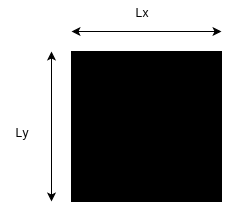

In [8]:
from IPython.display import SVG
SVG(filename='../images/block1.svg')

### (b) Square no-flux

A 2D square domain with $L_x = L_y = 200$ and no flux boundary conditions.

### (c) T-shape

A T-shaped region with zero flux boundary conditions and with dimensions, $a=b=100$  and  $c=d=20$.

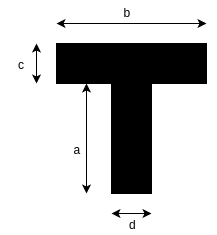

In [9]:
from IPython.display import SVG
SVG(filename='../images/t-shape.svg')

### (d) Sphere

The domain is the surface of a sphere with radius 100.

## Initial conditions

The initial conditions for the first benchmark problem are chosen such that the average value of $c$ over the computational domain is approximately $0.5$.

### Initial conditions for (a), (b) and (c)

The initial value for $c$ on the square and "T" computational domains is
specified by 
$$
c\left(x,y\right) =
c_{0}+\epsilon\left[\cos\left(0.105x\right)\cos\left(0.11y\right)+\left[\cos\left(0.13x\right)\cos\left(0.087y\right)\right]^{2}\right.\nonumber \\
  \left.+\cos\left(0.025x-0.15y\right)\cos\left(0.07x-0.02y\right)\right],
$$
where $c_{0}=0.5$ and $\epsilon=0.05$. The intial value for $\eta_i$ on the square and "T" domain are given by,

\begin{align*}
\eta_{i}\left(x,y\right)  = & \epsilon_{\eta}\left\{ \cos\left(\left(0.01i\right)x-4\right)\cos\left(\left(0.007+0.01i\right)y\right)\right.\nonumber \\
   & +\cos\left(\left(0.11+0.01i\right)x\right)\cos\left(\left(0.11+0.01i\right)y\right)\nonumber \\
   & +\psi\left[\cos\left(\left(0.046+0.001i\right)x+\left(0.0405+0.001i\right)y\right)\right.\nonumber \\
   & \left.\left.\cos\left(\left(0.031+0.001i\right)x-\left(0.004+0.001i\right)y\right)\right]^{2}\right\} ^{2}
\end{align*}

where $\epsilon_{\eta}$=0.1 and $\psi$=1.5.

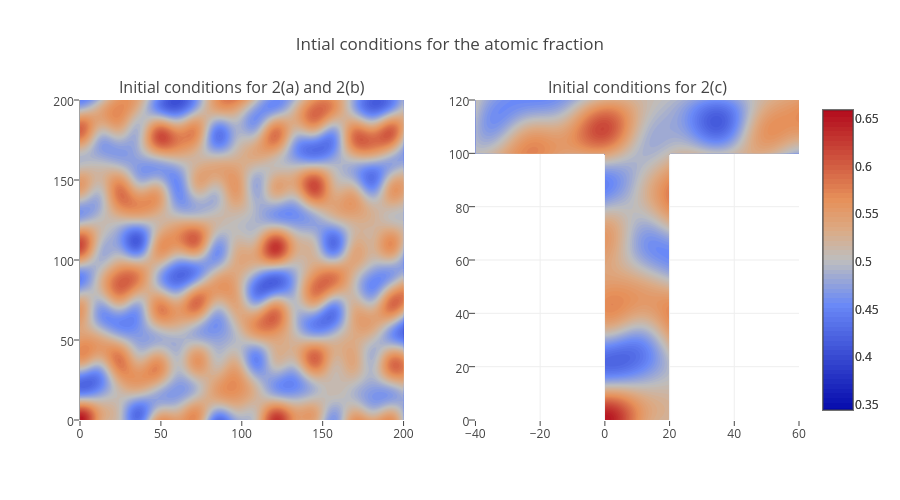

In [71]:
import plotly.plotly as py
import plotly
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np

init_notebook_mode(connected=True)

Ngrid = 200

c_0 = 0.5
epsilon = 0.05

x_ab = np.linspace(0, 200, Ngrid)
y_ab = np.linspace(0, 200, Ngrid)

def c_ini(x_, y_):
    y = y_[:, None]
    x = x_[None, :]
    c = c_0 + epsilon * (np.cos(0.105 * x) * np.cos(0.11 * y) + (np.cos(0.13 * x) * np.cos(0.087 * y))**2 \
                         + np.cos(0.025 * x - 0.15 * y) * np.cos(0.07 * x - 0.02 * y))
    return x, y, c

y_c = np.linspace(0, 120, Ngrid)
x_c = np.linspace(-40, 60, Ngrid)
x_c_, y_c_, c_c_ = c_ini(x_c, y_c)
mask = ((x_c_ < 0) | (x_c_ > 20)) & (y_c_ < 100)
c_c_[mask] = np.NaN
c_c = c_c_

zmin, zmax = 0.34, 0.66

trace1 = go.Contour(
    x=x_ab,
    y=y_ab,
    z=c_ini(x_ab, y_ab)[2],
    zmin=zmin,
    zmax=zmax,
    line=dict(smoothing=0.85),
    ncontours=100,
    contours=dict(coloring="fill",
                  showlines=False)
)

trace2 = go.Contour(
    x=x_c,
    y=y_c,
    z=c_c,
    zmin=zmin,
    zmax=zmax,
    line=dict(smoothing=0.85),
    ncontours=100,
    colorscale='RdBu',
    contours=dict(coloring="fill",
                  showlines=False))

layout = dict(
    title="Intial conditions for the atomic fraction",
    autosize=False,
    height=500.,
    width=900.,
    xaxis2 = dict(
        zeroline=False
    ),
    yaxis2 = dict(
        zeroline=False
    ),
    yaxis1 = dict(
        zeroline=False
    )    
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Initial conditions for 2(a) and 2(b)', 
                                                          'Initial conditions for 2(c)'), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(layout)
py.image.ishow(fig)

In [15]:
import numpy as np

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()
N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10))

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11")

output_file("image.html", title="image.py example")

show(p, notebook_handle=True)  # open a browse

Loading BokehJS ...

INFO:bokeh.core.state:Session output file 'image.html' already exists, will be overwritten.


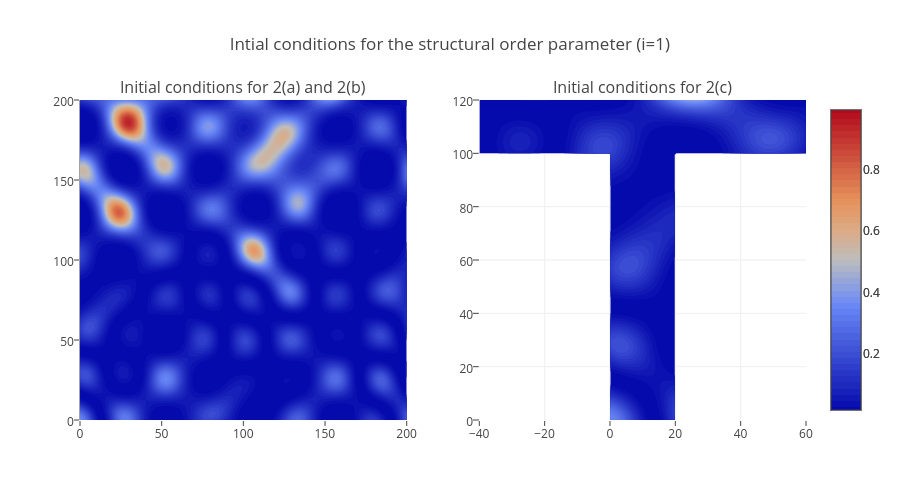

In [73]:
import plotly.plotly as py
import plotly
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np

init_notebook_mode(connected=True)

Ngrid = 200

epsilon_eta= 0.1
psi = 1.5

x_ab = np.linspace(0, 200, Ngrid)
y_ab = np.linspace(0, 200, Ngrid)

def eta_ini(x_, y_, i):
    y = y_[:, None]
    x = x_[None, :]
    eta = epsilon_eta * (np.cos(0.01 * i * x - 4) * np.cos((0.007 + 0.01 * i) * y) \
                         + np.cos((0.11 + 0.01 * i) * x) * np.cos((0.11 + 0.01 * i) * y) \
                         + psi * (np.cos((0.046 + 0.001 * i) * x + (0.0405 + 0.001 * i) * y) \
                                  * np.cos((0.031 + 0.001 * i) * x - (0.004 + 0.001 * i) * y))**2)**2
    return x, y, eta

y_c = np.linspace(0, 120, Ngrid)
x_c = np.linspace(-40, 60, Ngrid)
x_c_, y_c_, c_c_ = eta_ini(x_c, y_c, 1)
mask = ((x_c_ < 0) | (x_c_ > 20)) & (y_c_ < 100)
c_c_[mask] = np.NaN
c_c = c_c_

zmin, zmax = 0.0, 1.0

trace1 = go.Contour(
    x=x_ab,
    y=y_ab,
    z=eta_ini(x_ab, y_ab, 1)[2],
    zmin=zmin,
    zmax=zmax,
    line=dict(smoothing=0.85),
    ncontours=100,
    contours=dict(coloring="fill",
                  showlines=False)
)

trace2 = go.Contour(
    x=x_c,
    y=y_c,
    z=c_c,
    zmin=zmin,
    zmax=zmax,
    line=dict(smoothing=0.85),
    ncontours=100,
    colorscale='RdBu',
    contours=dict(coloring="fill",
                  showlines=False))

layout = dict(
    title="Intial conditions for the structural order parameter (i=1)",
    autosize=False,
    height=500.,
    width=900.,
    xaxis2 = dict(
        zeroline=False
    ),
    yaxis2 = dict(
        zeroline=False
    ),
    yaxis1 = dict(
        zeroline=False
    )    
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Initial conditions for 2(a) and 2(b)', 
                                                          'Initial conditions for 2(c)'), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(layout)
py.image.ishow(fig)

### Initial conditions for (d)

The initial value of $c$ for the spherical computational domain is specified by
$$
c\left(\theta,\phi\right) = c_{0}+\epsilon_{sphere}\left[\cos\left(8\theta\right)\cos\left(15\phi\right)+\left(\cos\left(12\theta\right)\cos\left(10\phi\right)\right)^{2}\right.\nonumber \\
+\left.\cos\left(2.5\theta-1.5\phi\right)\cos\left(7\theta-2\phi\right)\right],
$$
where $\epsilon_{\text{sphere}}=0.5$ and $c_0=0.5$, and $\theta$ and $\phi$ are the polar and azimuthal angles, respectively, in a spherical coordinate system. These angles are translated into a Cartesian system as $\theta=\cos^{-1}\left(z/r\right)$ and $\phi=\tan^{-1}\left(y/x\right)$ dependent upon angle.

The intial value for $\eta_i$ for the spherical domain is specified by

\begin{eqnarray}
\eta_{i}\left(\theta,\phi\right) & = & \epsilon_{\eta}^{sphere}\left\{ \cos\left(i\theta-4\right)\cos\left(\left(0.7+i\right)\phi\right)\right.\nonumber \\
 &  & +\cos\left(\left(11+i\right)\theta\right)\cos\left(\left(11+i\right)\phi\right)\nonumber \\
 &  & \psi\left[\cos\left(\left(4.6+0.1i\right)\theta+\left(4.05+0.1i\right)\phi\right)\right.\nonumber \\
 &  & \left.\left.\cos\left(\left(3.1+0.1i\right)\theta-\left(0.4+0.1i\right)\phi\right)\right]^{2}\right\} ^{2}
\end{eqnarray}

where  $\epsilon_{\eta}^{sphere}=0.1$ and $i=1,\ldots,4$ enumerates the order parameters corresponding to the different phase variants.

In [11]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np
from skimage import measure

plotly.offline.init_notebook_mode()

epsilon_sphere = 0.05
c_0 = 0.5
R = 100.
NN = 40
X,Y,Z = np.mgrid[-R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j, -R * 1.1:R * 1.1:NN * 1j]
surf_eq = np.sqrt(X**2 + Y**2 + Z**2) - R
 
vertices, simplices = measure.marching_cubes(surf_eq, 0)
x,y,z = zip(*vertices)  
rescale = lambda xx: 2 * R * 1.1 * (np.array(xx) / (NN - 1) - 0.5)
x = rescale(x)
y = rescale(y)
z = rescale(z)

def color_func(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan(y / x)
    cc = c_0 + epsilon_sphere * (np.cos(8 * theta) * np.cos(15 * phi) \
                                 + (np.cos(12 * theta) * np.cos(10 * phi))**2 \
                                 + np.cos(2.5 * theta - 1.5 * phi) * np.cos(7 * theta - 2 * phi))
    return cc
    #zmax = 0.9
    #zmin = 0.1
 
    #return (zmax - cc) / (zmax - zmin)

fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        color_func=color_func,
                        colormap="RdBu",
                        simplices=simplices,
                        show_colorbar=True,
                        title="Atomic fraction initial conditions for 1(d)")
#py.image.ishow(fig)
iplot(fig)
#plotly.plotly.iplot(fig)

## Results

The results required to compare phase field codes are still being evalutated. However, the initial  comparison scheme will include the global free energy as a function of time and the $c$ field at various snapshot times ($t = 1, 5, 10, 20, 100, 200, 500, 1000, 2000, 3000, 10000$). Results of studies between different codes will be linked to from here.

In [1]:
%%HTML
<div id="disqus_thread"></div>
<script type="text/javascript">
    /* * * CONFIGURATION VARIABLES * * */
    // Required: on line below, replace text in quotes with your forum shortname
    var disqus_shortname = 'chimad-phase-field';
    
    /* * * DON'T EDIT BELOW THIS LINE * * */
    (function() {
        var dsq = document.createElement('script'); dsq.type = 'text/javascript'; dsq.async = true;
        dsq.src = '//' + disqus_shortname + '.disqus.com/embed.js';
        (document.getElementsByTagName('head')[0] || document.getElementsByTagName('body')[0]).appendChild(dsq);
    })();
</script>
<noscript>Please enable JavaScript to view the <a href="https://disqus.com/?ref_noscript" rel="nofollow">comments powered by Disqus.</a></noscript>